In [14]:
import torch.nn as nn

In [15]:
your_neural_net = nn.Sequential(
  nn.Linear(28*28, 10),
  nn.LogSoftMax()
  ).cuda()

AttributeError: module 'torch.nn' has no attribute 'LogSoftMax'

## 1. Get the Data

Load libraries

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

ModuleNotFoundError: No module named 'fastai.torch_imports'

Pull the saved data

In [7]:
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

Deconstructing

In [8]:
((x, y), (x_valid, y_valid), _) = load_mnist(FILENAME)

Data Normalization + Processing

### Image size: 28 x 28

We also notice that the dimensions are too high, this is because of the way that the data is stored. We will need to extract.

### Vocab:
**Vector** = 1d array = rank 1 tensor
**Matrix** = 2d array = rank 2 tensor
**cube** = 3d array = rank 3 tensor

If we take a look at the dimensions of the variables that we have loaded

In [9]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

### Does normalization matter for random forests for independent variables ?

No, When we normalize, we only care about the order. This is also why random forests are resilient to outliers.

### Does normalization matter for deep learning ?

Yes, because we are making a parameterized model.

## Normalizing the entire dataset

In [10]:
mean = x.mean()
std = x.std()
x=(x-mean)/std
x.mean(), x.std()

(-3.1638146e-07, 0.99999934)

## Normalize the Validation Set
Note that we are using the entire dataset mean and std to transform the validation set. This is to ensure standardized transformation between all datasets.

In [11]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

## Helper Methods for Plotting
Wrapping the matplotlib library for showing images to make our lives a bit easier

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def show(img, title=None):
    plt.imshow(img, interpolation='none', cmap="gray")
    if title is not None: plt.title(title)
        
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation='none', cmap='gray')       

### Remember that all the data is stacked together, we will split into the individual images

In [14]:
x_valid.shape

(10000, 784)

**10,000 x 784 ** --> **10,000 x 28 x 28 **

(-1,28,28) - All neural networks, the first axis is a row, image, a sentence, example, then we reshape the last two axis

In [15]:
x_imgs = np.reshape(x_valid, (-1,28,28)); x_imgs.shape

(10000, 28, 28)

### Example of a Reshape operation
![image](image.png)
![image2](image2.png)

### Look at a image sample - first img

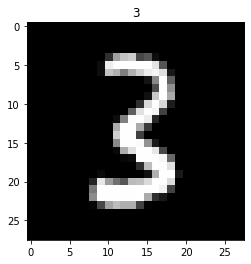

In [16]:
show(x_imgs[0], y_valid[0])

### Look at a labels - first label

In [17]:
y_valid.shape

(10000,)

In [18]:
y_valid[0]

3

### Look at part of an image (look at a portion of image #1)
Note we are using numpy’s indexing to get to a portion of a matrix
![1](1.png)
![2](2.jpg)
![3](3.png)


In [19]:
x_imgs[0,10:15,10:15]

array([[-0.42451727, -0.42451727, -0.42451727, -0.42451727,  0.17294396],
       [-0.42451727, -0.42451727, -0.42451727,  0.7831172 ,  2.4356694 ],
       [-0.42451727, -0.27197397,  1.2026112 ,  2.778892  ,  2.8043158 ],
       [-0.42451727,  1.7619367 ,  2.8043158 ,  2.8043158 ,  1.7365128 ],
       [-0.42451727,  2.2068546 ,  2.8043158 ,  2.8043158 ,  0.4017589 ]],
      dtype=float32)

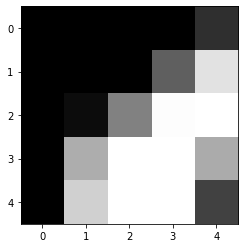

In [20]:
show(x_imgs[0,10:15,10:15])

### Preview some of the different classes of images

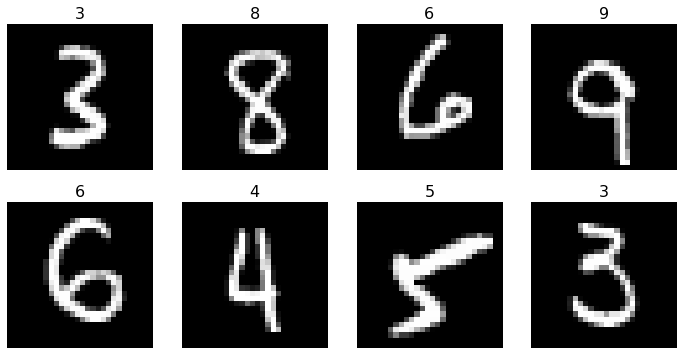

In [21]:
plots(x_imgs[:8], titles=y_valid[:8])

import libraries

In [23]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *
from fastai.core import *

import torch.nn as nn

#Torch.nn Docs can be found here:
#http://pytorch.org/docs/master/nn.html 14

ModuleNotFoundError: No module named 'fastai.model'

In [24]:
net = nn.Sequential(
    nn.Linear(28*28, 10),
    nn.LogSoftmax()
)#.cuda() #<--- signals to run on the GPU

**nn.Linear(28*28, 10)** - there are 28 x 28 images and output 10 size (for number classes). Linear layer, y = ax + b in a matrix format

**nn.LogSoftmax()** - This is the non-linear layer. These can be converted to comparative probabilities

In [26]:
md = ImageClassifierData.from_arrays(FILENAME, (x,y), (x_valid, y_valid))

NameError: name 'ImageClassifierData' is not defined

In [28]:
x.shape

(50000, 784)

In [29]:
loss=nn.NLLLoss()
metrics=[accuracy]
opt=optim.Adam(net.parameters())

**loss function** - this is our primary metric to determine how we are doing better. How do we score? (lower is better)

``nn.NLLLoss()`` class torch.nn.NLLLoss(weight=None, size_average=True, ignore_index=-100, reduce=True)[source]
The negative log likelihood loss.

In [31]:
net.fit(net, md, epochs=1, crit=loss, opt=opt, metrics=metrics)

AttributeError: 'Sequential' object has no attribute 'fit'